Answer for the Data Science Question
---

In [267]:
#Importing different packages

%matplotlib inline
import pandas as pd
import sklearn.decomposition as skd
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import sklearn.preprocessing as pps
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import cross_val_score

from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt




In [2]:
# Reading the data from csv using pandas

df=pd.read_csv('./data/abalone.csv')
df.head()

,sex,1,2,3,4,5,6,7,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
df.sex.value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [11]:
cols=['1', '2', '3', '4', '5']

In [ ]:
#Exploratory Data Analysis

/home/admin1/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


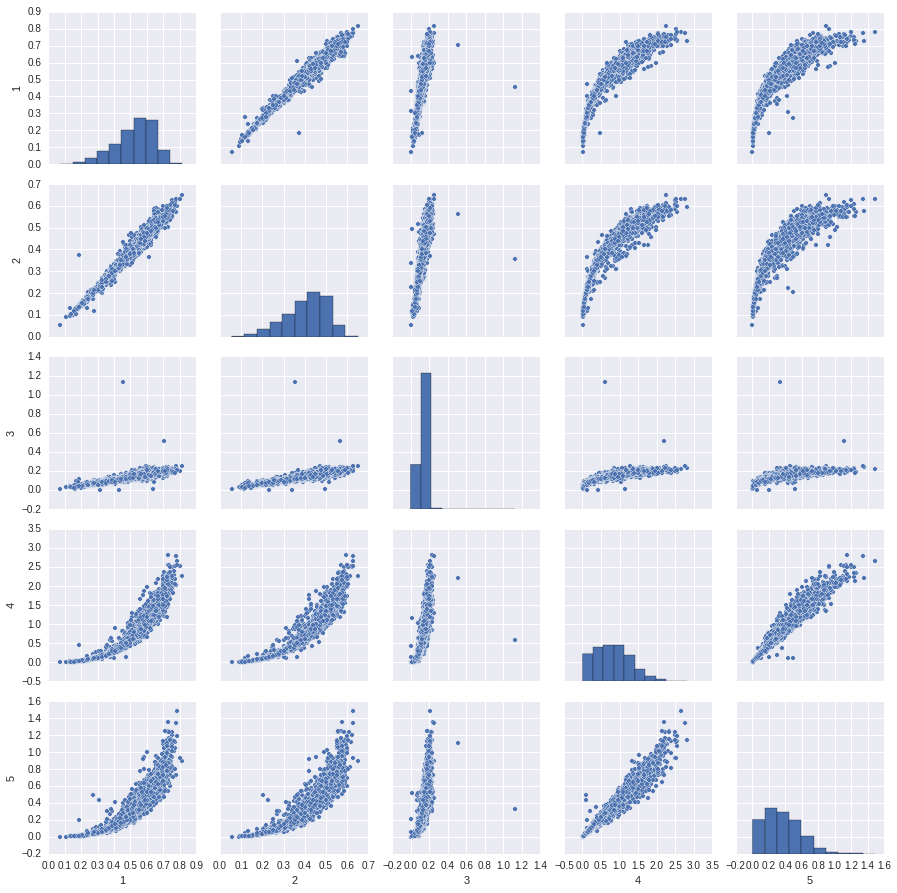

In [12]:
sns.pairplot(df[cols],size=2.5)
plt.show()

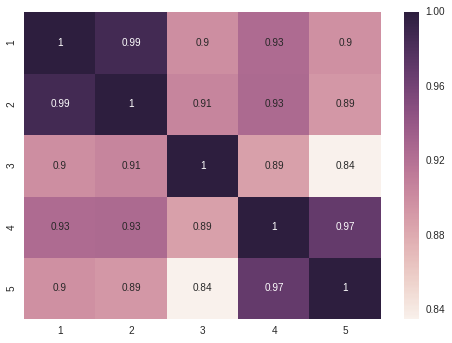

In [284]:
#Plotting heatmap to see the corelation
crcoeff= np.corrcoef(df[cols].values.T)

sns.set(font_scale=1)
hm=sns.heatmap(crcoeff,yticklabels=cols,cbar=True,
               annot=True,
               xticklabels=cols)
plt.show()

#The heatmap shows that there is a strong co relation between the features

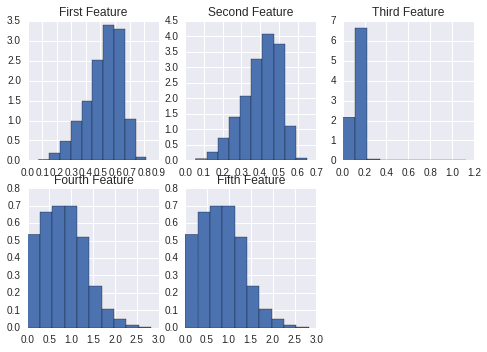

In [33]:
plt.subplot(2, 3, 1)
plt.hist(df['1'], normed=True)
plt.title("First Feature")
plt.subplot(2, 3, 2)
plt.hist(df['2'], normed=True)
plt.title("Second Feature")
plt.subplot(2, 3, 3)
plt.hist(df['3'], normed=True)
plt.title("Third Feature")

plt.subplot(2, 3, 4)
plt.hist(df['4'], normed=True)
plt.title("Fourth Feature")

plt.subplot(2, 3, 5)
plt.hist(df['4'], normed=True)
plt.title("Fifth Feature")
plt.show()

In [ ]:
#We can figure out the skewness from the above histogram
#Some of the feature are left skewed and some are right skewed

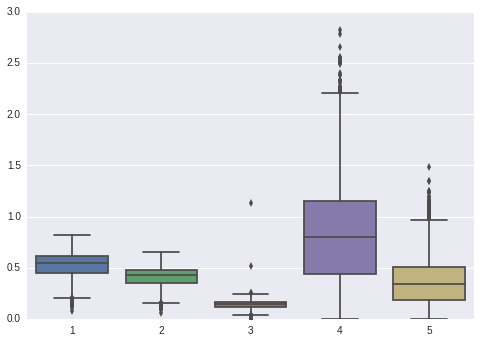

In [45]:
sns.boxplot(df[['1','2','3','4','5']])

Outlier Treatment
---

In [67]:
#Seeing the above box plot we can figure out that there is a outliar in the third box plot so we need to treat it.
#Finding the index of the outlier and then replacing it with the mean
outlier_index=np.argmax(df['3'])
df['3'][outlier_index]=df['3'].mean()

/home/admin1/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


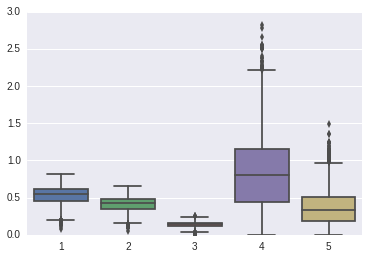

In [69]:
sns.boxplot(df[['1','2','3','4','5']])

Now if we see the above plot the outlier is no more present in third box plot. So our outlier treatment is done.
---

In [122]:
sex = df['sex'].values
age = df['age'].values
males = df[df['sex']=='M']
females = df[df['sex']=='F']
infant=df[df['sex']=='I']
raw_measurements = df[['1','2','3','4','5']]

In [123]:
for label in "MFI":
    raw_measurements[label] = df["sex"] == label


/home/admin1/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [124]:
raw_measurements.head()

,1,2,3,4,5,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,True,False,False
1,0.350,0.265,0.090,0.2255,0.0995,True,False,False
2,0.530,0.420,0.135,0.6770,0.2565,False,True,False
3,0.440,0.365,0.125,0.5160,0.2155,True,False,False
4,0.330,0.255,0.080,0.2050,0.0895,False,False,True


In [125]:
raw_measurements.M=raw_measurements.M.astype(int)
raw_measurements.F=raw_measurements.F.astype(int)
raw_measurements.I=raw_measurements.I.astype(int)

In [126]:
raw_measurements.head()

,1,2,3,4,5,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,1,0,0
1,0.350,0.265,0.090,0.2255,0.0995,1,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0,1,0
3,0.440,0.365,0.125,0.5160,0.2155,1,0,0
4,0.330,0.255,0.080,0.2050,0.0895,0,0,1


In [127]:
X = pps.scale(raw_measurements)
y = age


In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Decision Tree Model
---

In [183]:
decision_tree_model = DecisionTreeRegressor(max_depth=6,min_samples_split=2)
# fit the estimator to the data
decision_tree_model.fit(X_train, y_train)
# apply the model to the test and training data
predicted_decision_test_y = decision_tree_model.predict(X_test)


In [184]:
print "Error for Decision Tree Regressor",mean_squared_error(predicted_decision_test_y,y_test)
print "Score for Decision Tree Regressor",decision_tree_model.score(X_test,y_test)

Error for Decision Tree Regressor 6.64728308779
Score for Decision Tree Regressor 0.409539823818


Cross Validating Model
---

In [282]:
cv_score_dt=cross_val_score(decision_tree_model,X_test,y_test,cv=30)

In [283]:
print "Cross validation score",cv_score_dt.mean(),cv_score_dt.std() *2

Cross validation score 0.323819075847 0.477797835046


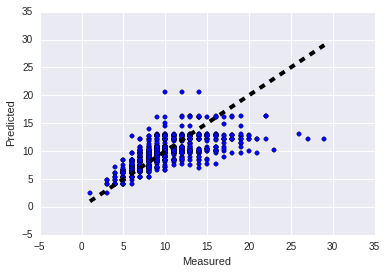

In [227]:
fig, ax = plt.subplots()
ax.scatter(y_test, predicted_decision_test_y)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

SVM Model
---

In [ ]:
#Using Grid SEarch to find the best parameter

In [256]:
from sklearn.grid_search import GridSearchCV
svm_m=SVR()

In [258]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
gridsvm=GridSearchCV(svm_m,param_grid)
gridsvm.fit(X_train, y_train)
print(gridsvm.best_params_)

{'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}


In [261]:
svm_model=SVR(kernel='rbf',C=1000.0, epsilon=0.4,gamma=.1)
svm_model.fit(X_train, y_train)
predicted_svm_test_y = svm_model.predict(X_test)

In [262]:
print "Error for SVM",mean_squared_error(predicted_svm_test_y,y_test)
print "Score for SVM",svm_model.score(X_test,y_test)

Error for SVM 4.86984420506
Score for SVM 0.567424911904


Cross Validating the Model
---

In [272]:

#Referred from http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_digits.html#example-exercises-plot-cv-digits-py
cv_score_svm=cross_val_score(svm_model,X_test,y_test,cv=20)

In [273]:
print "Cross validation score",cv_score_svm.mean(),cv_score_svm.std() *2

Cross validation score 0.456179964118 0.552823669842


In [271]:
confusion_matrix(y_test, np.round(predicted_svm_test_y), labels=None)

array([[ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  6,  4,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  3, 10, 18,  4,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  3, 18, 21,  6,  5,  1,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2, 12, 35, 23, 15,  7,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  5, 20, 39, 46, 20,  7,  0,  2,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 

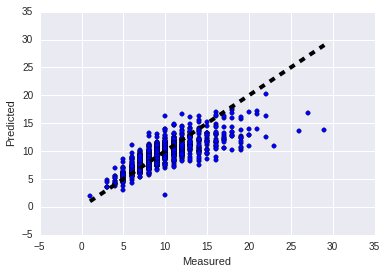

In [226]:
fig, ax = plt.subplots()
ax.scatter(y_test, predicted_svm_test_y)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Gradient Boosting Model
---

In [187]:
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1,max_depth=1,
                                                        random_state=0,
                                loss='ls',max_features=1,subsample=.5)

In [188]:
gradient_boosting_regressor.fit(X_train, y_train)
predicted_gradient_test_y = gradient_boosting_regressor.predict(X_test)

In [189]:
print "Error for GradientBoosting",mean_squared_error(predicted_gradient_test_y,y_test)
print "Score for GradientBoosting",gradient_boosting_regressor.score(X_test,y_test)

Error for GradientBoosting 6.70706437036
Score for GradientBoosting 0.404229614192


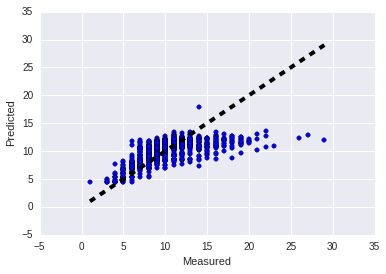

In [225]:
fig, ax = plt.subplots()
ax.scatter(y_test, predicted_gradient_test_y)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Ada Boost Model
---

In [221]:
#svm_model_reg=SVR(kernel='rbf',C=100.0, epsilon=0.4,gamma=.1)
#ada_boost=AdaBoostRegressor(base_estimator=svm_model_reg)
ada_boost=AdaBoostRegressor()
ada_boost.fit(X_train, y_train)
predicted_ada_test_y = ada_boost.predict(X_test)

In [222]:
print "Error for Ada",mean_squared_error(predicted_ada_test_y,y_test)
print "Score for Ada",ada_boost.score(X_test,y_test)

Error for Ada 7.15949947213
Score for Ada 0.364041027912


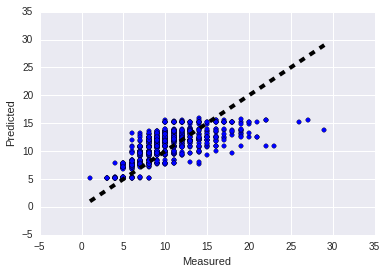

In [224]:
fig, ax = plt.subplots()
ax.scatter(y_test, predicted_ada_test_y)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Random Forest Model
---

In [240]:
model1=RandomForestRegressor()

In [ ]:
#Using Grid Search

In [253]:
from sklearn.grid_search import RandomizedSearchCV
grid = RandomizedSearchCV(model1, n_iter=20, 
           param_distributions=dict(
                                         max_depth=np.arange(5,20+1), 
                                         max_features=np.arange(1, X_train.shape[1]+1)
                                   )
        )
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_features': 7, 'max_depth': 10}


In [249]:
random_forest_regressor=RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=10, 
                      min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                      max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False,
                      n_jobs=1, random_state=None, verbose=0, warm_start=False)

random_forest_regressor.fit(X_train, y_train)
predicted_random_forest_test_y = random_forest_regressor.predict(X_test)

In [250]:
print "Error for Random Forest",mean_squared_error(predicted_random_forest_test_y,y_test)
print "Score for Random Forest",random_forest_regressor.score(X_test,y_test)

Error for Random Forest 5.36345332322
Score for Random Forest 0.523578949122


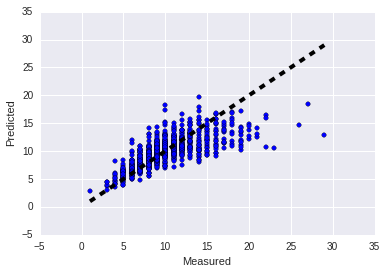

In [223]:
#predicted = clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, predicted_random_forest_test_y)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

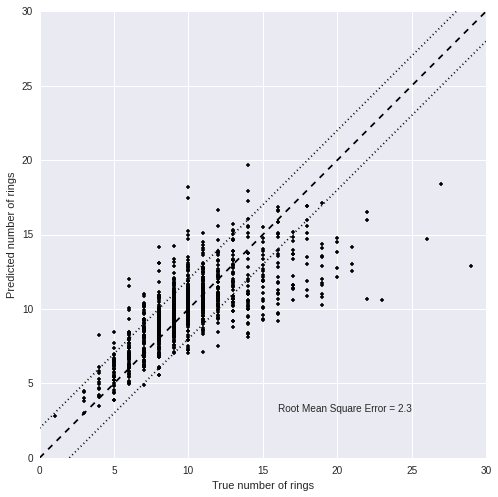

In [229]:
rms_random_forest = scatter_y(y_test, predicted_random_forest_test_y)

In [ ]:
#This plot code has been referred from 
#https://bids.github.io/2015-06-04-berkeley/intermediate-python/03-sklearn-abalone.html

In [228]:


def scatter_y(true_y, predicted_y):
    """Scatter-plot the predicted vs true number of rings
    
    Plots:
       * predicted vs true number of rings
       * perfect agreement line
       * +2/-2 number dotted lines

    Returns the root mean square of the error
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(true_y, predicted_y, '.k')
    
    ax.plot([0, 30], [0, 30], '--k')
    ax.plot([0, 30], [2, 32], ':k')
    ax.plot([2, 32], [0, 30], ':k')
    
    rms = (true_y - predicted_y).std()
    
    ax.text(25, 3,
            "Root Mean Square Error = %.2g" % rms,
            ha='right', va='bottom')

    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    
    ax.set_xlabel('True number of rings')
    ax.set_ylabel('Predicted number of rings')
    
    return rms

Final Analysis
---

In [ ]:
In initial EDA analysis I  plotted different graphs like scatter plot, histogram , box plot to 
see the skewness and identified outliers.
Outliers were treated and it was replaced with the mean value.

In [ ]:
I applied different models like 
>DecisionTree
>SVM
>GradientBoosting
>Ada Booster
>Random Forest

I used GridSearch for finding the optimised parameter.
For Validating Model used cross validation score and confusion matrix these were applied for SVM Model

In [ ]:
The best performing model was SVM it gave the 
Error for SVM 4.86984420506
Score for SVM 0.567424911904